<a href="https://colab.research.google.com/github/SKawsar/Data_Visualization_with_Python_s2/blob/main/Lecture_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 07: Data Visualization: Boxplot, Violinplot

Instructor: Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- Boxplot
- Violinplot

#### References:
[1] https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html
<br>[2] Seaborn Boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html
<br>[3] Seaborn Violinplot: https://seaborn.pydata.org/generated/seaborn.violinplot.html
<br>[4] Color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html
<br>[5] Boxplots are Awesome!!!: https://www.youtube.com/watch?v=fHLhBnmwUM0&ab_channel=StatQuestwithJoshStarmer
<br>[6] Quantiles and Percentiles, Clearly Explained!!!: https://www.youtube.com/watch?v=IFKQLDmRK0Y&ab_channel=StatQuestwithJoshStarmer

In [43]:
# required library for data analysis
import pandas as pd
import numpy as np

# required librairies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

#### Loading the dataset

In [44]:
df = pd.read_csv("telecom_data.csv")

display(df.head())

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Total_mins,Total_calls,Total_charges
0,128,25,1,no,no,yes,717.2,303,320.26
1,107,26,1,no,no,yes,625.2,332,313.64
2,137,0,0,no,no,no,539.4,333,224.89
3,84,0,2,no,yes,no,564.8,255,263.70
4,75,0,3,no,yes,no,512.0,359,238.99


In [45]:
display(df.describe())

,Account_Length,Vmail_Message,CustServ_Calls,Total_mins,Total_calls,Total_charges
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,1.562856,591.864776,305.137114,260.321791
std,39.822106,13.688365,1.315491,89.954251,34.448164,53.810896
min,1.000000,0.000000,0.000000,284.300000,191.000000,68.370000
25%,74.000000,0.000000,1.000000,531.500000,282.000000,224.220000
50%,101.000000,0.000000,1.000000,593.600000,305.000000,260.560000
75%,127.000000,20.000000,2.000000,652.400000,328.000000,295.410000
max,243.000000,51.000000,9.000000,885.000000,416.000000,460.630000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   CustServ_Calls  3333 non-null   int64  
 3   Churn           3333 non-null   object 
 4   Intl_Plan       3333 non-null   object 
 5   Vmail_Plan      3333 non-null   object 
 6   Total_mins      3333 non-null   float64
 7   Total_calls     3333 non-null   int64  
 8   Total_charges   3333 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 234.5+ KB


In [47]:
df.columns

Index(['Account_Length', 'Vmail_Message', 'CustServ_Calls', 'Churn',
       'Intl_Plan', 'Vmail_Plan', 'Total_mins', 'Total_calls',
       'Total_charges'],
      dtype='object')

In [48]:
num_cols = ['Account_Length', 'Vmail_Message', 'CustServ_Calls', 
            'Total_mins', 'Total_calls', 'Total_charges']

In [49]:
df['Intl_Plan'].dtypes

dtype('O')

#### create a boxplot

<AxesSubplot:ylabel='Total_charges'>

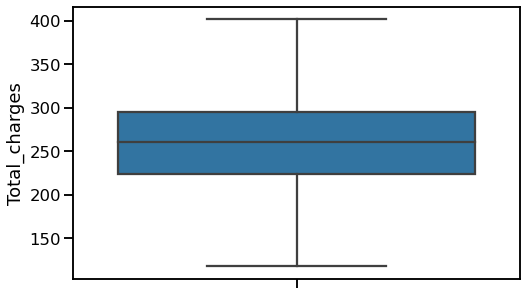

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(y = "Total_charges", data=df, showfliers=False)

# min
# first quartile (25th percentile)
# median (50th percentile)
# third quartile (75th percentile)
# max
# range = max-min
# IQR (inter-quartile range) = third quartile - first quartile

#### Separate the numerical columns

In [51]:
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)
#         print(num_cols)

print(num_cols)

['Account_Length', 'Vmail_Message', 'CustServ_Calls', 'Total_mins', 'Total_calls', 'Total_charges']


In [52]:
num_cols[5]

'Total_charges'

#### Create a for loop to show the boxplots of all numeric features

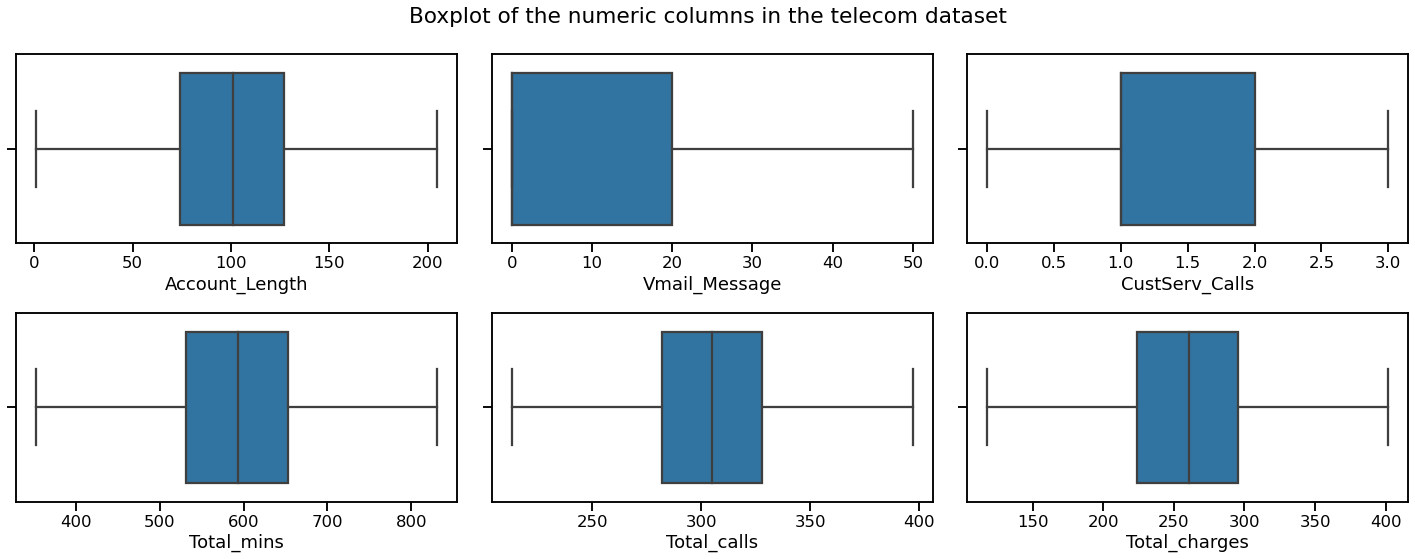

In [53]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
    
#     print("index = ", index, "position = ", index+1, "column name = ", num_cols[index])
    
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the telecom dataset")
plt.tight_layout()
plt.show()

#### Adding categorical features in the boxplot

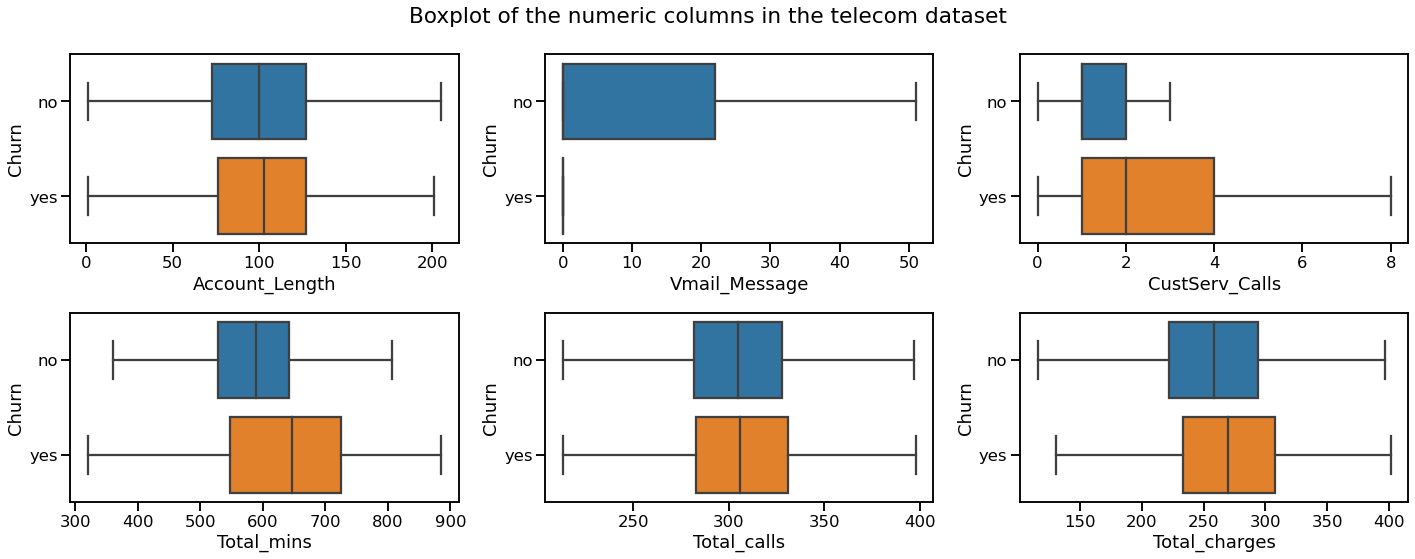

In [55]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=False, y=df["Churn"])

plt.suptitle("Boxplot of the numeric columns in the telecom dataset")
plt.tight_layout()
plt.show()

In [56]:
df["Churn"].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

#### Adding categorical features (hue) in the boxplot

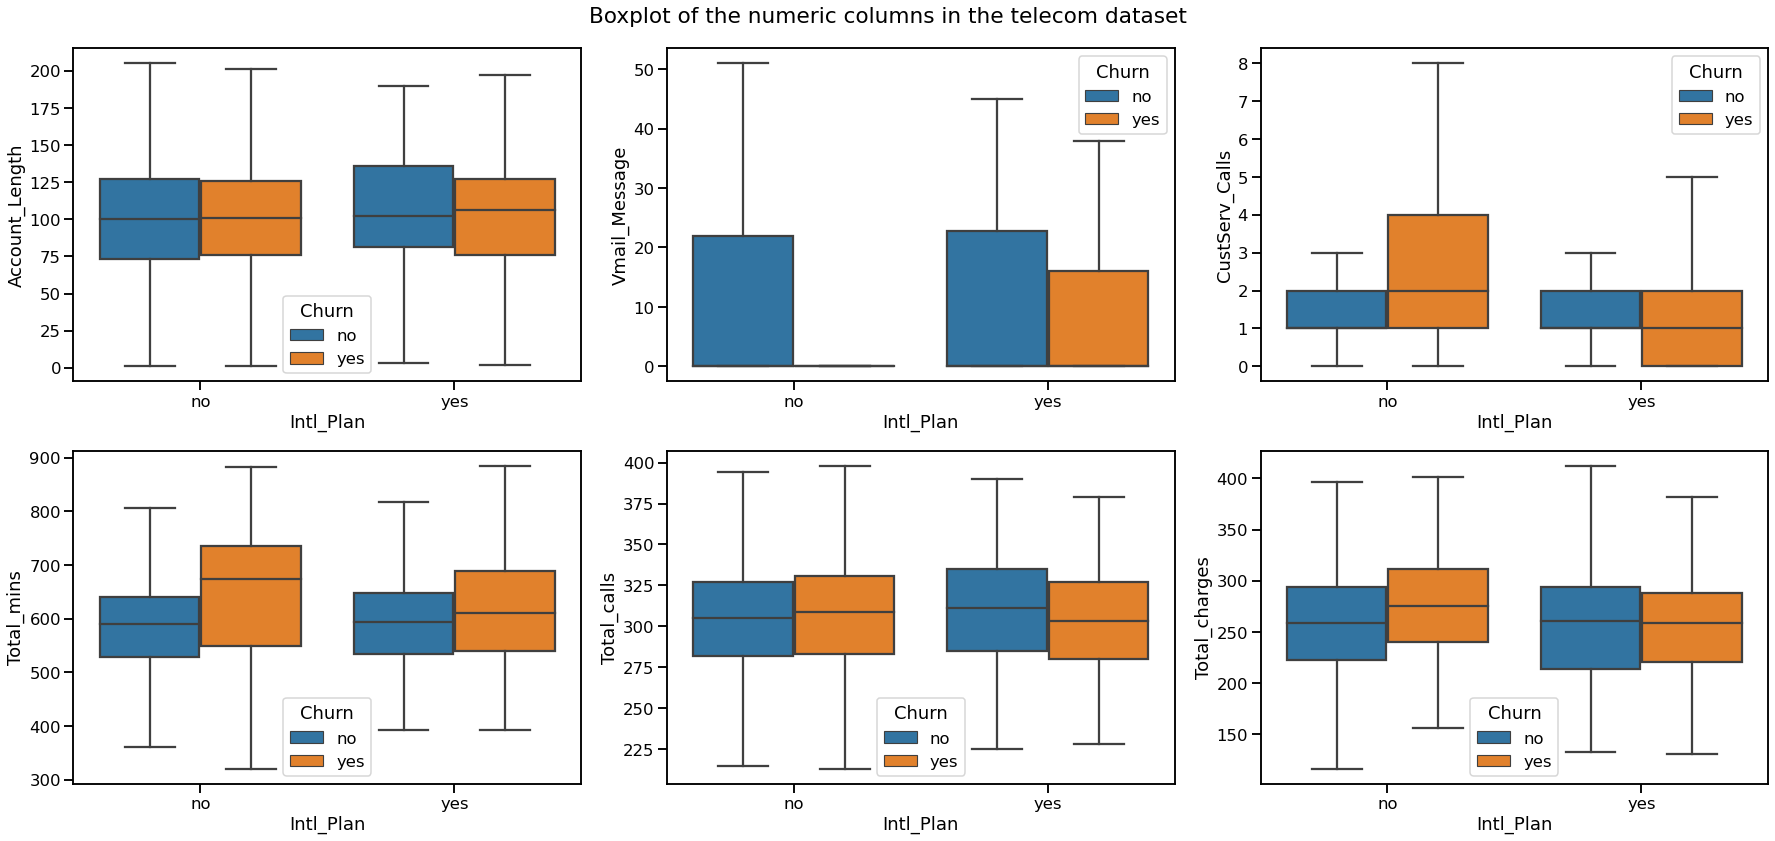

In [61]:
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=df[num_cols[index]], x=df["Intl_Plan"], hue=df["Churn"], showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the telecom dataset")
plt.tight_layout()
plt.show()

#### Comparing boxplots and violinplot

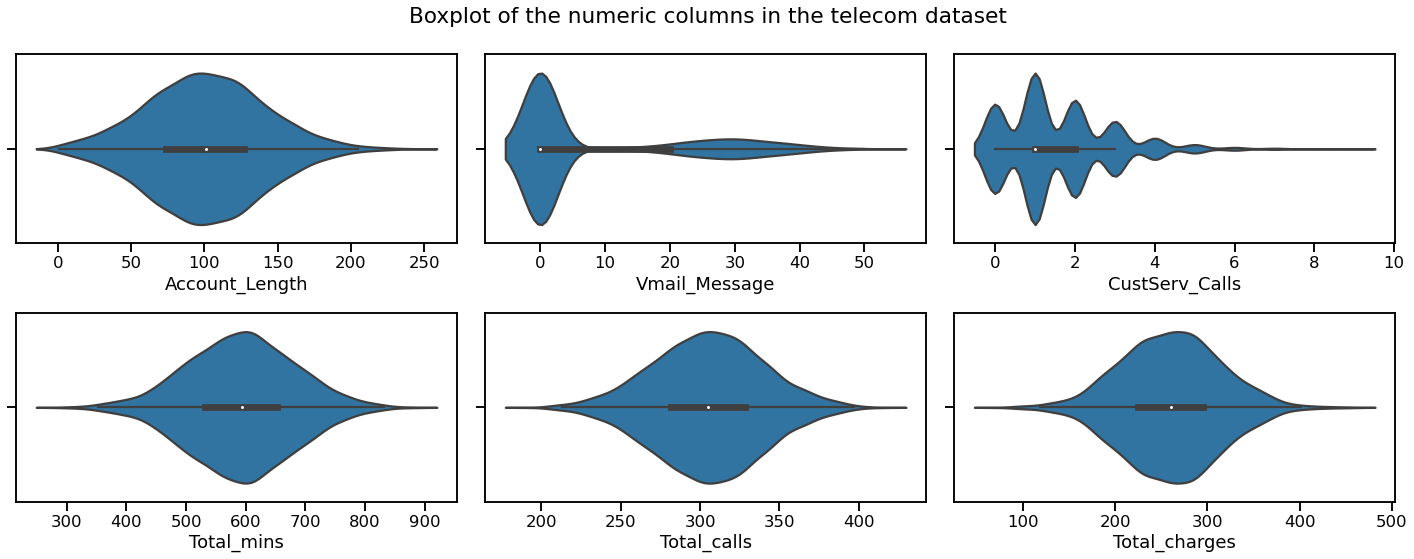

In [62]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the telecom dataset")
plt.tight_layout()
plt.show()

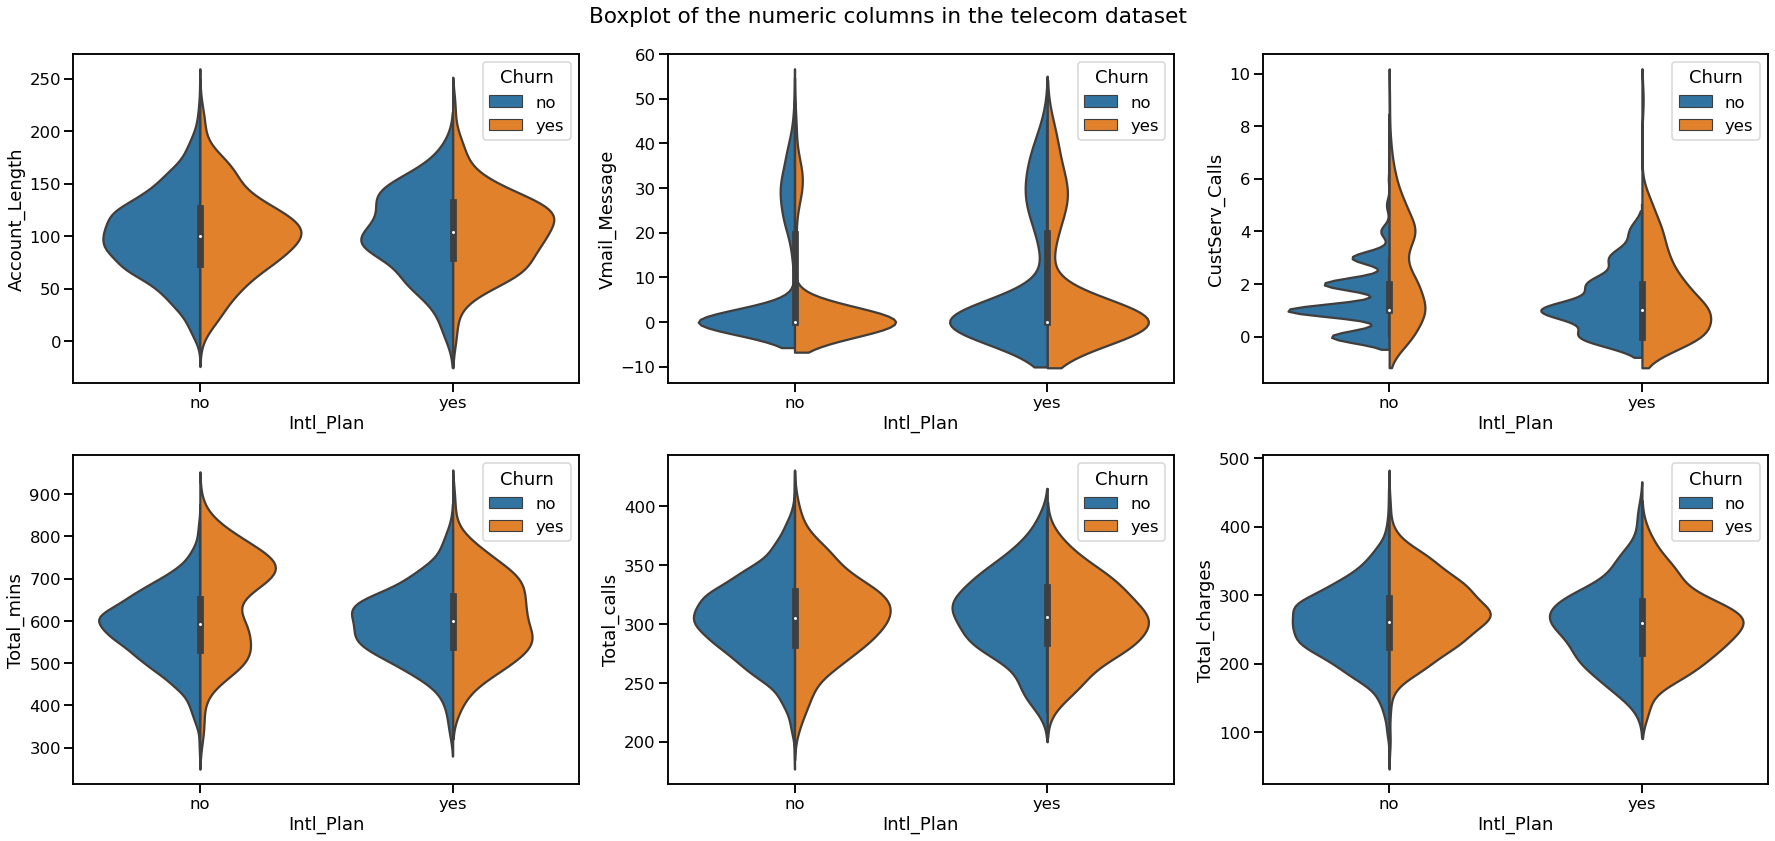

In [69]:
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(y=df[num_cols[index]], x=df["Intl_Plan"], hue=df["Churn"], showfliers=False, split=True)

plt.suptitle("Boxplot of the numeric columns in the telecom dataset")
plt.tight_layout()
plt.show()